In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras as k

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

<Figure size 200x200 with 0 Axes>

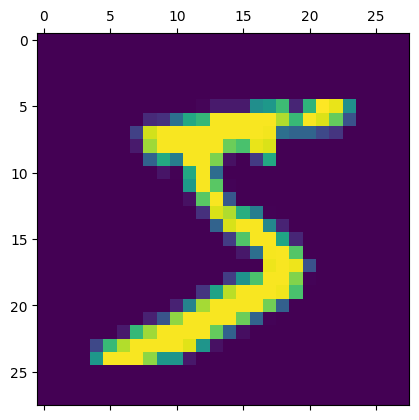

In [5]:
plt.figure(figsize=(2, 2))
plt.matshow(x_train[0])

In [6]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [7]:
x_test_flattened.shape, x_test.shape

((10000, 784), (10000, 28, 28))

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [9]:
model.fit(x_train_flattened, y_train, epochs=10)

Epoch 1/10


C:\Users\muham\AppData\Local\anaconda3\envs\myenv_ver_3_12_4\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8143 - loss: 0.7216
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9124 - loss: 0.3113
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9194 - loss: 0.2840
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9249 - loss: 0.2686
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9255 - loss: 0.2679
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9264 - loss: 0.2621
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9297 - loss: 0.2564
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9308 - loss: 0.2512
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9295 - loss: 0.2527
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9335 - loss: 0.2428


In [10]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9158 - loss: 0.2959


[0.2627122700214386, 0.926800012588501]

In [11]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([2.6934457e-03, 1.2279274e-08, 2.2735516e-02, 9.6827143e-01,
       1.3617871e-03, 1.4181055e-01, 4.2375074e-08, 9.9983168e-01,
       7.9859659e-02, 6.8983531e-01], dtype=float32)

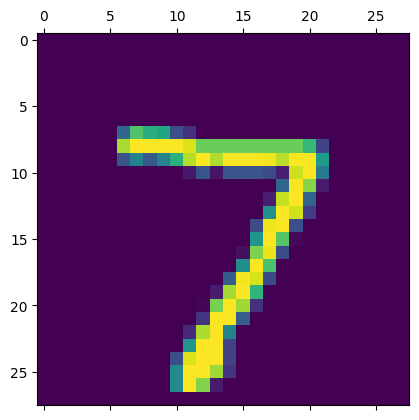

In [12]:
plt.matshow(x_test[0])

In [13]:
np.argmax(y_predicted[0])

7

In [14]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [15]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    1,    2,    0,    8,    8,    3,    1,    1],
       [   0, 1107,    4,    2,    0,    1,    4,    2,   15,    0],
       [   3,    7,  929,   16,    8,    4,   13,    9,   40,    3],
       [   2,    0,   17,  924,    0,   23,    3,   11,   24,    6],
       [   1,    1,    5,    2,  917,    0,    8,    6,   10,   32],
       [   7,    2,    1,   37,    7,  782,   13,    8,   29,    6],
       [   8,    3,    7,    1,    7,   16,  912,    2,    2,    0],
       [   1,    6,   24,    3,    7,    1,    0,  951,    2,   33],
       [   5,    5,    6,   21,    9,   24,    9,   11,  877,    7],
       [   9,    7,    1,   11,   25,    6,    0,   30,    7,  913]])>

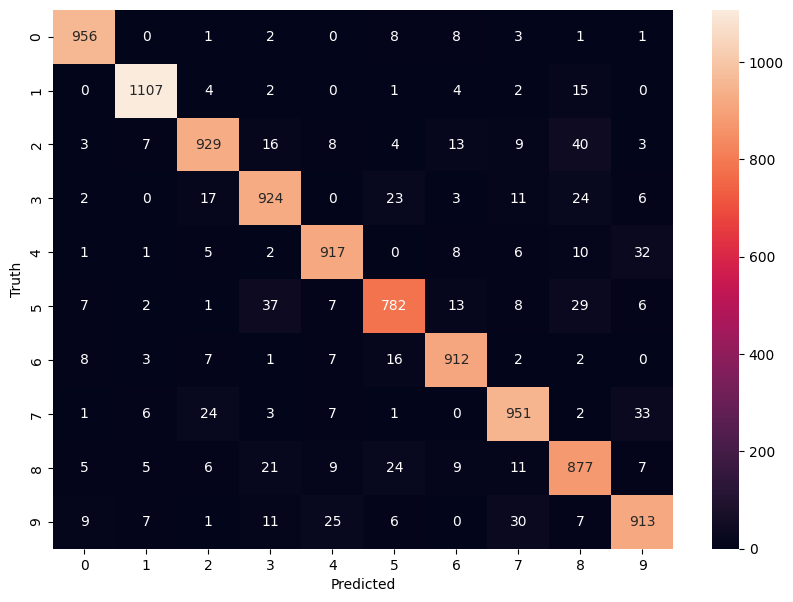

In [16]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel("Truth")
plt.show()

# Using hidden layer

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [19]:
model.fit(x_train_flattened, y_train, epochs=10)

Epoch 1/10


C:\Users\muham\AppData\Local\anaconda3\envs\myenv_ver_3_12_4\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8660 - loss: 0.4676
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9612 - loss: 0.1335
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9747 - loss: 0.0855
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9796 - loss: 0.0676
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9846 - loss: 0.0501
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9882 - loss: 0.0405
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9907 - loss: 0.0328
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9924 - loss: 0.0260
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9928 - loss: 0.0221
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9945 - loss: 0.0183


In [20]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9740 - loss: 0.1014


[0.08606048673391342, 0.977400004863739]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

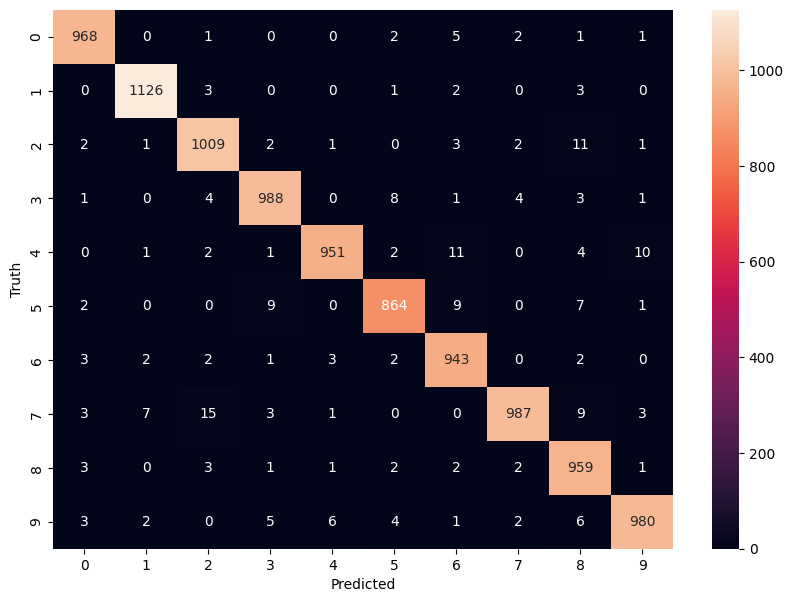

In [21]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Flatten layer so that we don't have to call .reshape on input dataset

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


C:\Users\muham\AppData\Local\anaconda3\envs\myenv_ver_3_12_4\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8611 - loss: 0.4819
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9558 - loss: 0.1502
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9687 - loss: 0.1079
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9726 - loss: 0.0901
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9773 - loss: 0.0712
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9805 - loss: 0.0596
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9817 - loss: 0.0567
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9830 - loss: 0.0523
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9842 - loss: 0.0468
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9866 - loss: 0.0400


In [25]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9747 - loss: 0.0893


[0.0740194097161293, 0.9787999987602234]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

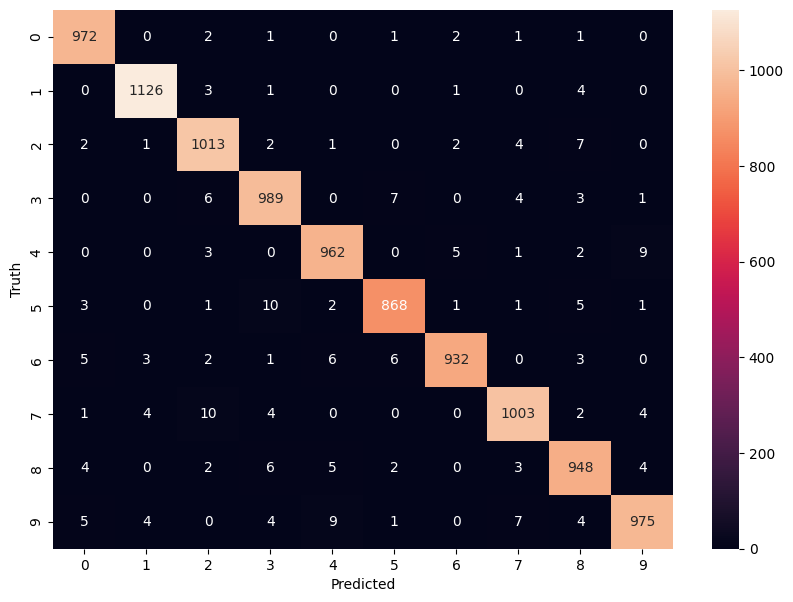

In [26]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')